# Тема “Обучение без учителя”

### Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

In [98]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg' 
from sklearn.datasets import load_boston

boston = load_boston()
data = boston['data']
target = boston.target
feature_names = boston.feature_names

X = pd.DataFrame(data, columns=feature_names)
y = pd.DataFrame(target, columns=["price"])


In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Масштабируйте данные с помощью StandardScaler.

In [116]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
X_train_scaled

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.694865,0.000000,2.628491,0.0,5.222922,7.485465,3.479940,0.986899,2.797502,4.012849,9.074814,3.821411,3.507672
1,0.070779,0.000000,1.182095,0.0,4.576437,8.233447,2.020726,2.113421,0.466250,1.849767,9.434213,4.325931,1.192693
2,0.003910,1.513591,0.880036,0.0,3.724947,8.511471,0.833326,3.119769,0.116563,1.831691,7.592295,3.961045,1.102572
3,0.795393,0.000000,2.628491,0.0,5.222922,8.613084,3.043606,0.949832,2.797502,4.012849,9.074814,0.027555,3.279554
4,0.081881,0.000000,1.182095,0.0,4.576437,8.082440,2.485671,1.783577,0.466250,1.849767,9.434213,4.274867,1.588380
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.019314,0.000000,1.243088,0.0,4.423322,8.236270,3.286809,1.038717,0.582813,2.313715,9.389288,4.326478,2.627586
400,0.033750,0.864909,1.010735,0.0,3.946964,8.264496,1.505709,2.080723,0.349688,1.343642,8.356017,4.249718,1.830580
401,0.001693,3.459638,0.291893,0.0,3.700279,9.363888,1.062222,3.919971,0.466250,1.687084,7.637220,4.274758,0.843475
402,1.259061,0.000000,2.628491,0.0,6.294727,9.355420,3.383374,0.998174,2.797502,4.012849,9.074814,1.201162,3.276738


Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.

In [113]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)
X_test_tsne = tsne.fit_transform(X_test_scaled)

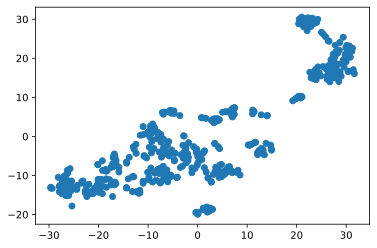

In [114]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

### Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.


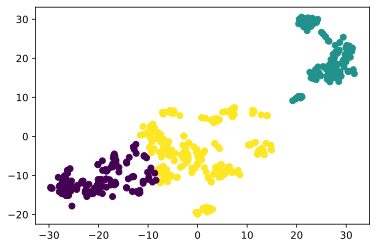

In [119]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
label_train = kmeans.fit_predict(X_train_tsne)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=label_train)
plt.show()

In [104]:
print('Средний показатель цены в кластере 0: ', y_train.loc[label_train==0, 'price'].mean(), '\n',
     'Средний показатель цены в кластере 1: ', y_train.loc[label_train==1, 'price'].mean(), '\n',
     'Средний показатель цены в кластере 2: ', y_train.loc[label_train==2, 'price'].mean(), '\n',
     'Средний показатель преступности в кластере 0: ', X_train.loc[label_train==0, 'CRIM'].mean(), '\n',
     'Средний показатель преступности в кластере 1: ', X_train.loc[label_train==1, 'CRIM'].mean(), '\n',
     'Средний показатель преступности в кластере 2: ', X_train.loc[label_train==2, 'CRIM'].mean())

Средний показатель цены в кластере 0:  26.213513513513508 
 Средний показатель цены в кластере 1:  16.277227722772285 
 Средний показатель цены в кластере 2:  24.250520833333336 
 Средний показатель преступности в кластере 0:  0.08389432432432434 
 Средний показатель преступности в кластере 1:  13.17982178217822 
 Средний показатель преступности в кластере 2:  0.6125629166666667


### * Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


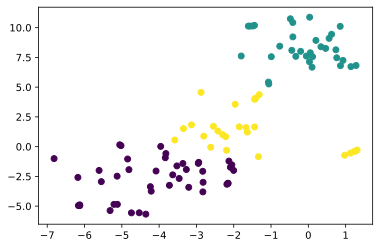

In [121]:
label_test = kmeans.fit_predict(X_test_tsne)
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=label_test)

plt.show()


In [127]:
print('Средний показатель цены в кластере 0: ', y_test.loc[label_test==0, 'price'].mean(), '\n',
     'Средний показатель цены в кластере 1: ', y_test.loc[label_test==1, 'price'].mean(), '\n',
     'Средний показатель цены в кластере 2: ', y_test.loc[label_test==2, 'price'].mean(), '\n',
     'Средний показатель преступности в кластере 0: ', X_test.loc[label_test==0, 'CRIM'].mean(), '\n',
     'Средний показатель преступности в кластере 1: ', X_test.loc[label_test==1, 'CRIM'].mean(), '\n',
     'Средний показатель преступности в кластере 2: ', X_test.loc[label_test==2, 'CRIM'].mean())

Средний показатель цены в кластере 0:  26.45581395348837 
 Средний показатель цены в кластере 1:  16.421212121212122 
 Средний показатель цены в кластере 2:  19.70384615384615 
 Средний показатель преступности в кластере 0:  0.10472930232558135 
 Средний показатель преступности в кластере 1:  10.707682121212121 
 Средний показатель преступности в кластере 2:  0.4807576923076922
